# Demo of the PHOENIX Interactive Dashboard for Stellar Spectra

[NOTE] You'll need to install `muler` for this tutorial. You can install it via pip.

In this tutorial we will see how the spectra of stars vary as a function of their intrinsic properties.

In [1]:
from gollum.phoenix import PHOENIXGrid, PHOENIXSpectrum
from specutils import Spectrum1D
import pandas as pd
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

### Fetch example IGRINS data

The data was downloaded from [here](https://github.com/OttoStruve/muler_example_data/blob/main/IGRINS/01_IGRINS_test_data/SDCH_20201202_0059.spec_a0v.fits) and [here](https://github.com/OttoStruve/muler_example_data/blob/main/IGRINS/01_IGRINS_test_data/SDCH_20201202_0059.variance.fits). You need both files in the same directory (in our example `tutorial_data`) for this to work!

In [2]:
from muler.igrins import IGRINSSpectrum

In [3]:
path = '../tutorial_data/SDCH_20201202_0059.spec_a0v.fits'

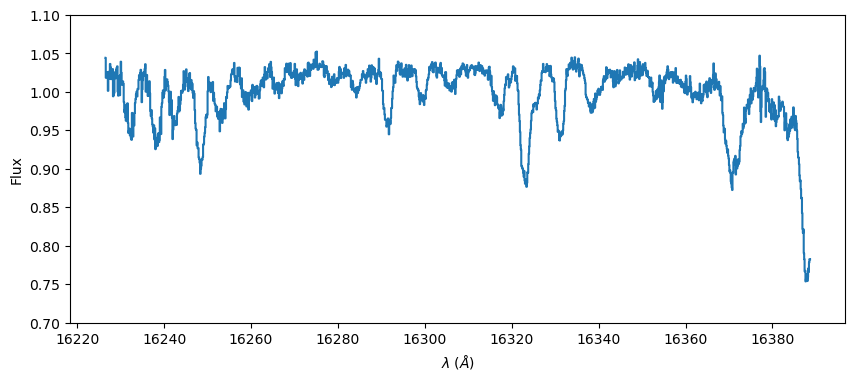

In [4]:
spec = IGRINSSpectrum(file=path, order=12).normalize().remove_nans().trim_edges()
spec.plot(color=None, ylo=0.7, yhi=1.1)
plt.show()

### Load the PHOENIX Grid

The online installation guide shows [how to download and store the PHOENIX models](https://gollum-astro.readthedocs.io/en/latest/fetching_models.html).

In [5]:
grid = PHOENIXGrid(teff_range=(2500, 7000), logg_range=(2, 5), Z_range=(0, 0.5), wl_lo= 16200, wl_hi= 16400)

Processing Teff=7000K|log(g)=5.00|Z=+0.5: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 644/644 [00:05<00:00, 124.69it/s]


You should achieve a fairly good fit with the following parameters:
Teff: 5000, log(g): 2, Metallicity: 0, Rotational Broadening: 29.3, RV: 41.95, Scale Factor: 1.06

In [6]:
grid.show_dashboard(data=spec)